In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
im_name = 'grapes2.png'
path = os.path.join(os.path.expanduser('~'), 'cmp9767_ws/src/CMP9767/grape_counter', im_name)
im = cv2.imread(path)
#im = cv2.resize(im, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

cv2.imshow('Raw Image', im)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [10]:
blur = cv2.GaussianBlur(im,(5,5),0)
cv2.imshow('Raw Image', im)
cv2.imshow('Bl ur', blur)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [13]:
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv, (75, 0, 25), (150, 150, 75))
cv2.imshow("grapes?", mask1)
cv2.imshow('hsv',hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
import random as rng

#https://docs.opencv.org/3.4/df/d0d/tutorial_find_contours.html
#https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71
# using RETR_EXTERNAL to only get extreme outer contours (not holes inside objects) in one test gets from 267>139 contours
# CHAIN_APPROX_NONE maybe use _SIMPLE

# Find contours
_, contours, hierarchy = cv2.findContours(mask1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Draw contours
drawing_tree = np.zeros((mask1.shape[0], mask1.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(drawing_tree, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)
# Show in a window
cv2.imshow('Contours', drawing_tree)

# print(len(contours))

# Find contours
_, contours, hierarchy = cv2.findContours(mask1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# Draw contours
drawing_ext = np.zeros((mask1.shape[0], mask1.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv2.drawContours(drawing_ext, contours, i, color, 2, cv2.LINE_8, hierarchy, 0)
# Show in a window

cv2.imshow('Contours ext', drawing_ext)
cv2.waitKey(0)
cv2.destroyAllWindows()

267


In [18]:
#kernel = np.ones((5,5),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
erosion = cv2.erode(mask1,kernel,iterations = 1)
dilation = cv2.dilate(mask1,kernel,iterations = 1)
opening = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel)

cv2.imshow("grapes?", mask1)
cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)
cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
kernel_e3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_e5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel_r3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel_c3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))


opening1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel_e3)
opening2 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel_e5)
opening3 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel_r3)
opening4 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel_c3)


cv2.imshow("grapes?", mask1)
cv2.imshow('oe3', opening1)
cv2.imshow('oe5', opening2)
cv2.imshow('or3', opening3)
cv2.imshow('oc3', opening4)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
kernel_e3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
kernel_e5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#opening = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel)
#erosion = cv2.erode(mask1,kernel,iterations = 1)
#dilation = cv2.dilate(mask1,kernel,iterations = 2)

# full size image has less noise so just do some closing?
closing = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel_e5)

morphed = closing

cv2.imshow('hsv',hsv)
cv2.imshow("grapes?", mask1)
cv2.imshow('morphed', morphed)

In [26]:
_, contours, hierarchy = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
areas = np.empty(len(contours))

for i, c in enumerate(contours):
    areas[i] = cv2.contourArea(c)
    if areas[i] > 100:
        color = (255,0,150)
    else:
        color = (0,255,255)

    cv2.drawContours(drawing_ext, contours, i, color, 2)

cv2.imshow('Contours ext', drawing_ext)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
centroids = []
hsv_o = hsv.copy()
for c in contours:
    M = cv2.moments(c)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])

    centroids.append((cx,cy))

    hsv_o = cv2.circle(hsv_o, (cx, cy), 2, (0,255,255), 1)

cv2.imshow('Contours ext', drawing_ext)
cv2.imshow('centres?', hsv_o)
cv2.waitKey(0)
cv2.destroyAllWindows()

Fairly good results - it's getting the centre of most of the bunches - only appears to be one where it's merged into a big one. Next - do some transforms to get the dots in 3d space?

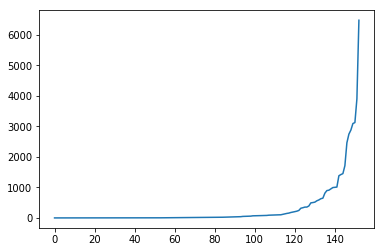

In [21]:
areas = np.empty(len(contours))
for i, c in enumerate(contours):
    areas[i] = cv2.contourArea(c)

areas = np.sort(areas)

plt.plot(areas)
plt.show()


In [24]:
areas[80]

17.0